# [112-2 多媒體技術與應用] Homework <br>

<font size = 4>
    請用.ipynb交作業，檔名用HW_學號_名稱.ipynb，例如: HW_0123456_黃大明.ipynb

## Q1 多元回歸(Multiple regression) (25%)


$$
({\bf{x}}_i,y_i) , {\bf{x}}_i = \begin{bmatrix} 1 \\ x_{i1} \\ \vdots \\ x_{id}\\ \end{bmatrix} \in R^{d+1}, \forall i=1,2,...,n 
$$

$$
{\bf{Y}} = \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_n\\ \end{bmatrix}, 
{\bf{\beta}} = \begin{bmatrix} \beta_0 \\ \beta_1 \\ \vdots \\ \beta_n\\ \end{bmatrix},
{\bf{X}} = \begin{bmatrix} \bf{X}_1^T \\ \bf{X}_2^T  \\ \vdots \\ \bf{X}_n^T \\ \end{bmatrix}
 = \begin{bmatrix} 1&x_{11}&...&x_{1d} \\ \ 1&x_{21}&...&x_{2d}  \\ \vdots \\ \ 1&x_{n1}&...&x_{nd} \\ \end{bmatrix} 
$$

**Regression:** $$\bf{Y}=  {\bf{X}}{\bf{\beta}}$$

$$
loss({\bf{\beta}})=(\bf{Y}-\hat{\bf{Y}})^T(\bf{Y}-\hat{\bf{Y}})
$$

<font size=4 color=red>**找${\bf{\beta}}$的closed-form solution**

In [1]:
import numpy as np
np.set_printoptions(suppress=True)
def solution(X,Y):
    A = np.dot(X.transpose(),X)
    B = np.dot(np.linalg.inv(A) , X.transpose())
    B =  np.dot(B , Y)
    return B

## Q2. 依據第Q1推出的公式做python程式(Numpy)撰寫 ，寫一個Multiple regression  (25%)<br>
Data在HW-RegressionExample.txt，第1欄是dependent variable(${\bf{Y}}$), 第2~5欄是independent variable(${\bf{X}}$)。<br><br>
<font size=4 color=red> 請用python print出算出來的$\beta$結果。</font>

In [2]:

X = np.loadtxt('HW-RegressionExample.txt',usecols=range(1,5) , dtype=int)
Y = np.loadtxt('HW-RegressionExample.txt',usecols=range(1) , dtype=int)
result = solution(X,Y)
print(np.around(result,5))

[-2891.44094    -0.00332    -0.65675  2659.39889]


## Q3 (50%)
<font size=3>
  
讀取「data_weight_multlfeatutes.xlsx」<br>
利用<font color=red>'身高', '體重'</font>當作自變數(X)<br>
<font color=red>'性別'</font>作為依變數(Y)。<br>
        
利用Pytorch寫一個簡單的羅吉斯回歸(logistic regression)分類(訓練X，然後評估訓練後X的正確率)<br>

$$
y_{hat} = \sigma(\beta_1 \times x_{身高}+\beta_2 \times x_{體重} + \beta_0)
$$
    

進行求解  <br>

1. 學習率0.1，學習次數10000次<br>
2. 學習率0.01，學習次數10000次<br>

I. 在每個實驗中都要劃出loss的變化(10%) <br> 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$(10%)<br> 
III. 劃出模型Decision Boundary的熱點圖。(20%)<br> 

3. 說明一下你看到的現象。 (10%)

    
-------------------------
以下為Hint<br>
訓練模型前請設定下面的random seed
```
import torch
torch.manual_seed(202404)
```
'身高': 前處理先除上200<br>
'體重': 前處理先除上100

print最後解的羅吉斯回歸的$\beta$   
```
print(model.linear.weight)
print(model.linear.bias)
```
理論上求出來的解如下:
    

I. 在每個實驗中都要劃出loss的變化<br>
loss = torch.nn.BCELoss()
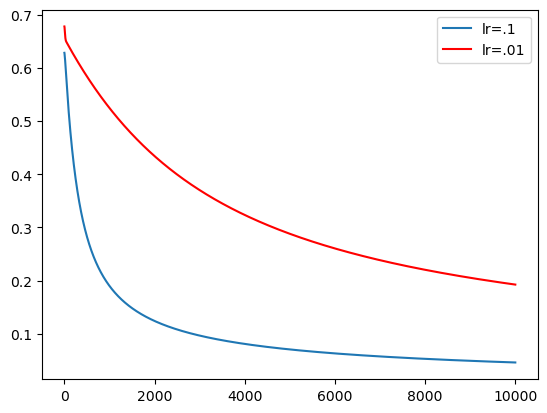  
 
II. print最後解的羅吉斯回歸的$\beta_0,\beta_1,\beta_2$<br>
    
|learning rate|$\beta_0$| $\beta_1$| $\beta_2$|
|:-:|:-:|:-:|:-:|
|0.1|-29.9621|5.0617| 41.4960|    
|0.01|-11.0679| 1.2951| 16.4604|   

III. 劃出模型Decision Boundary的熱點圖。<br> 
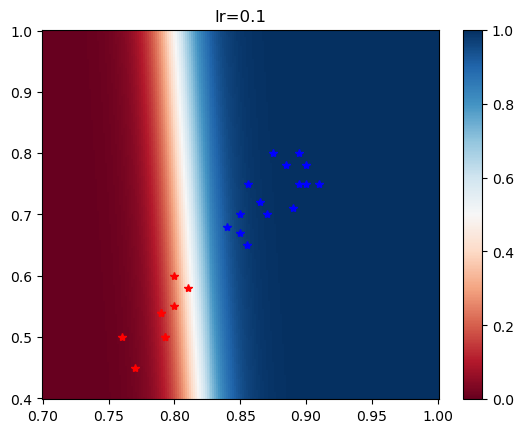
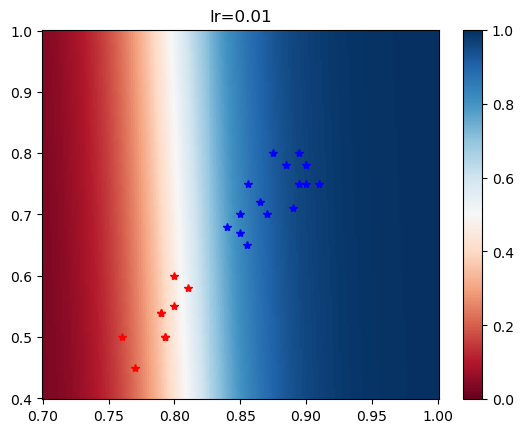

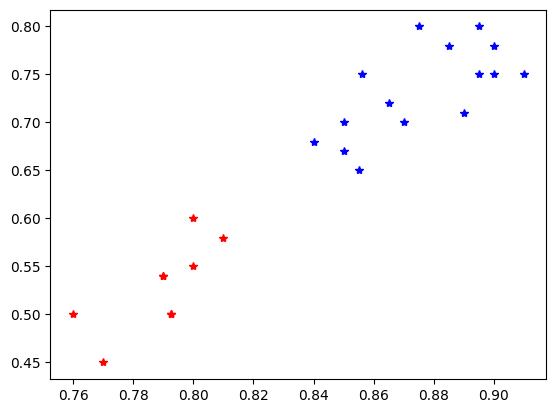

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

def load_classification_example():
    filename='.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) # 將"性別"裡的字串自動轉換成數值
    df["手機品牌"] = labelencoder.fit_transform(df["手機品牌"]) # 將"手機品牌"裡的字串自動轉換成數值
    X = np.array(df[['身高', '體重', '手機品牌','體脂肪']])
    Y = np.array(df['性別'])
    return X, Y
data, target = load_classification_example()

data[:,0]=data[:,0]/200
data[:,1]=data[:,1]/100
data=data[:,0:2]

pos0=np.where(target==0)[0]
pos1=np.where(target==1)[0]
plt.figure()
plt.plot(data[pos0,0],data[pos0,1],'r*')
plt.plot(data[pos1,0],data[pos1,1],'b*')
plt.show()

Parameter containing:
tensor([[ 1.5063, 16.5358]], requires_grad=True)
Parameter containing:
tensor([-11.2917], requires_grad=True)
Parameter containing:
tensor([[0.6909, 3.3980]], requires_grad=True)
Parameter containing:
tensor([-2.2034], requires_grad=True)


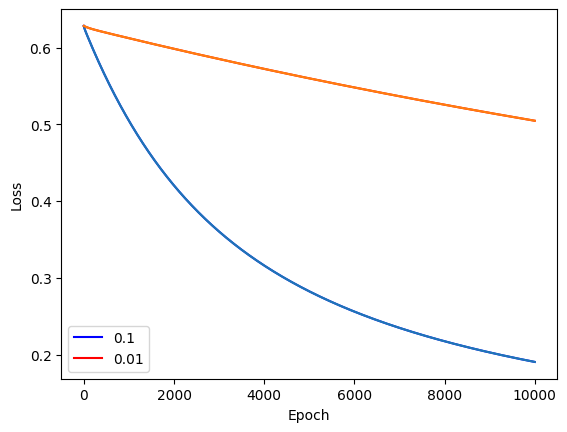

In [43]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder 
from matplotlib.colors import ListedColormap
import pylab as pl
# 0) data import and preprocessing
from sklearn import datasets


def plot_decision_boundary(X, y, model,test):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z =model(torch.from_numpy(np.c_[xx.ravel(), yy.ravel()].astype(np.float32))).detach().numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)

# make legend
plt.legend(loc='upper left', scatterpoints=1, numpoints=1)

# Define the run function
def run(rate):
    torch.manual_seed(202404)
    filename = '.\data_weight_multlfeatutes.xlsx'
    df = pd.read_excel(filename)
    labelencoder = LabelEncoder()
    df["性別"] = labelencoder.fit_transform(df["性別"]) 
    df["體重"] = (df["體重"]/100) 
    df["身高"] = (df["身高"]/200)
    x_data = np.array(df[['身高', '體重']])
    y_data = np.array(df[['性別']])
    x_data = torch.from_numpy(x_data.astype(np.float32))
    y_data = torch.from_numpy(y_data.astype(np.float32))
    feature_train = x_data
    target_train = y_data
    epoch_list = []
    loss_list = []

    # 1) model build
    class LogisticRegression(nn.Module):
        def __init__(self, input_dim):
            super(LogisticRegression, self).__init__()
            self.linear = nn.Linear(input_dim, 1)

        def forward(self, x):
            y_predicted = torch.sigmoid(self.linear(x))
            return y_predicted

    model = LogisticRegression(2)

    # 2) loss and optimizer
    learning_rate = rate
    criterion = nn.BCELoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

    # 3) Training loop
    epochs = 10000
    for epoch in range(epochs):
        y_predicted = model(feature_train)
        loss = criterion(y_predicted, target_train)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        epoch_list.append(epoch)
        loss_list.append(loss.item())

    print(model.linear.weight)
    print(model.linear.bias)

    # Plot decision boundary
    
    plot_decision_boundary(np.array(df[['身高', '體重']]), y_predicted.detach().numpy(), model,x_data)
    fig = plt.figure()
    plt.show()

    return epoch_list, loss_list

# Run the function
epoch_list, loss_list = run(0.1)
epoch_list2, loss_list2 = run(0.01)
plt.plot(epoch_list, loss_list, 'b', label='0.1')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.plot(epoch_list, loss_list)


plt.plot(epoch_list2, loss_list2, 'r', label='0.01')
plt.plot(epoch_list2, loss_list2)
plt.legend(loc='lower left')

In [ ]:
訓練越多次loss越低或學習率高loss也會比較低